In [1]:
import gcsfs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
from sklearn.metrics import mean_pinball_loss

In [3]:
RNG = np.random.default_rng(316)

In [4]:
permutation_out = RNG.permutation(np.delete(np.arange(262), 175))

In [5]:
train_indx = permutation_out[ :210]
test_indx = permutation_out[210: ]

In [6]:
train_indx

array([112,  13, 187, 231,  26, 240, 203,   0, 102, 186, 154,  18, 237,
        66, 236, 208,  20, 162, 161,  89, 150,  64,  69, 242,  46, 142,
         6,  34,  54, 257, 188,  14, 230, 106, 128, 163,  63,  32, 133,
        74,  80, 202,   4, 201, 215, 101, 104, 229, 140, 189, 134, 246,
        22, 256,  29,  81, 144, 211,  51, 105, 259, 155, 118, 143, 194,
        30,  95, 234, 184,  86, 173,  42,  88, 160,  57, 156,  87, 198,
        23,  99, 209, 165,   7,  39, 206, 146, 117,  90, 217, 235,  49,
         1,  56, 159, 197,  11,  24,  53, 100, 221, 216, 249, 214,  79,
       145, 147, 205, 107, 141, 121, 116,   9, 241, 247, 138, 110,   8,
        92, 193,  40, 228, 195, 136, 174, 258, 244, 103, 204, 181,  77,
        17, 254, 207,  36,  96,  27,  97, 176, 170,  45,  35, 125, 260,
       139,  78, 149,  73, 180, 108, 248, 225,  38, 120, 191,   3, 130,
        68, 122, 152, 212, 222, 172, 227, 251, 177, 166, 169, 238,  44,
        50, 226, 127, 111,  31,  16,  10,  47,  94, 129, 183,  5

In [3]:
fs = gcsfs.GCSFileSystem()
fs.ls('leap-persistent/yiqioyang/')

['leap-persistent/yiqioyang/cam6_PD_monthly_lwsw.zarr',
 'leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr',
 'leap-persistent/yiqioyang/gisse3ensemble_radiation_tcc_tlwp.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.1yearave.nc',
 'leap-persistent/yiqioyang/selected_cam6_fields.1yearave.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.2yearave.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.3yearave.zarr',
 'leap-persistent/yiqioyang/testing',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.1yearave.nc.zarr',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.2yearave.nc.zarr',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.3yearave.nc.zarr']

In [4]:
mapper = fs.get_mapper("gs://leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr")
ds_xr = xr.open_dataset(mapper, engine = 'zarr')

In [5]:
ds_xr

<xarray.Dataset> Size: 8GB
Dimensions:   (ensemble: 262, time: 36, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    PRECC     (ensemble, time, lat, lon) float32 2GB ...
    PRECL     (ensemble, time, lat, lon) float32 2GB ...
    PRECSC    (ensemble, time, lat, lon) float32 2GB ...
    PRECSL    (ensemble, time, lat, lon) float32 2GB ...
Attributes:
    cell_methods:  time: mean
    long_name:     Convective precipitation rate (liq + ice)
    units:         m/s

In [9]:
fs.ls('leap-persistent/kylemcevoy/')

['leap-persistent/kylemcevoy/amip_prec_q90.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_monthly_flut_ppe.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_monthly_fsntoa_ppe.zarr',
 'leap-persistent/kylemcevoy/cam6_pd_ppe_prect.zarr',
 'leap-persistent/kylemcevoy/ceres_glob_mean.zarr',
 'leap-persistent/kylemcevoy/ceres_toa.zarr',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile090.nc',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr',
 'leap-persistent/kylemcevoy/fsnt_ppe_glob_mean.zarr',
 'leap-persistent/kylemcevoy/prect_binned_ppe.zarr',
 'leap-persistent/kylemcevoy/satellite_climatologies_Nov2019.zarr',
 'leap-persistent/kylemcevoy/tropics_prect_target.zarr']

In [9]:
param_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr')
param_xr = xr.open_dataset(param_mapper, engine = 'zarr')

In [10]:
param_df = param_xr.to_pandas()

In [11]:
param_df

,Sample_nmb,cldfrc_dp1,cldfrc_dp2,clubb_C2rt,clubb_C6rt,clubb_C6rtb,clubb_C6thl,clubb_C6thlb,clubb_C8,clubb_beta,...,zmconv_c0_lnd,zmconv_c0_ocn,zmconv_capelmt,zmconv_dmpdz,zmconv_ke,zmconv_ke_lnd,zmconv_momcd,zmconv_momcu,zmconv_num_cin,zmconv_tiedke_add
nmb_sim,,,,,,,,,,,,,,,,,,,,,
0,000,0.100000,500.000000,1.000000,4.000000,6.000000,4.000000,6.000000,4.200000,2.400000,...,0.007500,0.030000,70.000000,-0.001000,0.000005,0.000010,0.700000,0.700000,1,0.500000
1,001,0.183597,460.982088,0.639954,5.692952,2.227144,5.692952,2.227144,1.388650,2.197079,...,0.058282,0.082909,135.511591,-0.001994,0.000004,0.000001,0.707965,0.075302,5,1.407011
2,002,0.056749,918.435211,0.988536,4.684344,4.378277,4.684344,4.378277,4.698416,2.209052,...,0.022977,0.089887,334.328338,-0.000776,0.000009,0.000009,0.775308,0.724252,3,0.049384
3,003,0.056049,419.880740,0.569771,4.667095,2.837883,4.667095,2.837883,4.493153,2.329254,...,0.049407,0.047437,220.190430,-0.001781,0.000004,0.000004,0.025246,0.990551,4,0.277879
4,004,0.125424,870.930018,1.753509,3.054750,3.640924,3.054750,3.640924,2.416152,1.828501,...,0.033027,0.052318,89.959407,-0.000906,0.000003,0.000004,0.210708,0.810342,4,0.418319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,0.068790,669.137462,0.607096,4.940034,6.218371,4.940034,6.218371,3.984370,1.778028,...,0.044082,0.094622,325.620048,-0.000596,0.000006,0.000008,0.276182,0.074872,1,0.169316
259,259,0.065671,339.813962,1.475709,3.866288,7.842054,3.866288,7.842054,3.667344,1.887339,...,0.020791,0.029269,292.604694,-0.001042,0.000005,0.000006,0.462378,0.722887,1,0.118879
260,260,0.202708,923.562725,0.266656,5.667292,4.028484,5.667292,4.028484,4.923064,1.632618,...,0.019338,0.022554,136.773622,-0.001326,0.000010,0.000005,0.856104,0.690697,4,0.970083


In [12]:
param_df = param_df.reset_index().drop(['Sample_nmb', 'nmb_sim'], axis = 1)

In [13]:
param_df = (param_df - param_df.min()) / (param_df.max() - param_df.min())

In [14]:
param_df

,cldfrc_dp1,cldfrc_dp2,clubb_C2rt,clubb_C6rt,clubb_C6rtb,clubb_C6thl,clubb_C6thlb,clubb_C8,clubb_beta,clubb_c1,...,zmconv_c0_lnd,zmconv_c0_ocn,zmconv_capelmt,zmconv_dmpdz,zmconv_ke,zmconv_ke_lnd,zmconv_momcd,zmconv_momcu,zmconv_num_cin,zmconv_tiedke_add
0,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,0.228024,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
1,0.669880,0.399841,0.243572,0.926436,0.037068,0.926436,0.037068,0.096803,0.662852,0.419150,...,0.575866,0.786760,0.319082,0.000000,0.323241,0.014546,0.709572,0.075295,1.00,0.704652
2,0.031916,0.909328,0.437713,0.672541,0.397322,0.672541,0.397322,0.926929,0.676214,0.881391,...,0.213848,0.874040,0.951315,0.679281,0.920222,0.837443,0.777268,0.726029,0.50,0.021192
3,0.028395,0.354064,0.204483,0.668199,0.139350,0.668199,0.139350,0.875447,0.810367,0.113342,...,0.484856,0.343082,0.588359,0.118671,0.356156,0.286239,0.023264,0.993060,0.75,0.136222
4,0.377308,0.856419,0.863762,0.262327,0.273836,0.262327,0.273836,0.354512,0.251496,0.615113,...,0.316902,0.404133,0.174227,0.607047,0.194170,0.306794,0.209701,0.812356,0.75,0.206922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.092477,0.631673,0.225271,0.736906,0.705486,0.736906,0.705486,0.747839,0.195164,0.605231,...,0.430254,0.933272,0.923623,0.779800,0.522542,0.766472,0.275518,0.074863,0.00,0.081568
259,0.076788,0.264890,0.709042,0.466614,0.977408,0.466614,0.977408,0.668325,0.317162,0.017842,...,0.191429,0.115839,0.818635,0.531257,0.491236,0.549083,0.462694,0.724660,0.00,0.056177
260,0.765996,0.915039,0.035665,0.919977,0.338742,0.919977,0.338742,0.983273,0.032878,0.243526,...,0.176530,0.031856,0.323095,0.372481,0.959486,0.455724,0.858489,0.692381,0.75,0.484692
261,0.255441,0.698665,0.863070,0.999910,0.249564,0.999910,0.249564,0.683599,0.704570,0.718731,...,0.908016,0.048347,0.049163,0.345854,0.247609,0.106590,0.530569,0.304652,0.50,0.997869


# Make weighted global mean PRECC

In [7]:
cos_weights = np.cos(np.radians(ds_xr.lat))

In [14]:
precc_weighted = ds_xr['PRECC'].weighted(cos_weights)

In [15]:
glob_mean_precc = precc_weighted.mean(dim=('lat','lon'))

In [17]:
glob_mean_precc = glob_mean_precc * (60 * 60 * 24 * 1000.)

In [19]:
glob_mean_precc.to_netcdf('glob_mean_precc.nc')

# Make weighted global mean PRECL

In [8]:
precl_weighted = ds_xr['PRECL'].weighted(cos_weights)

In [9]:
glob_mean_precl = precl_weighted.mean(dim=('lat','lon'))

In [10]:
glob_mean_precl = glob_mean_precl * (60 * 60 * 24 * 1000.)

In [11]:
glob_mean_precl.to_netcdf('glob_mean_precl.nc')

# Read in global mean PRECC

In [15]:
glob_mean_precc = xr.open_dataset('glob_mean_precc.nc')

In [17]:
glob_mean_precc

<xarray.Dataset> Size: 78kB
Dimensions:   (ensemble: 262, time: 36)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    PRECC     (ensemble, time) float64 75kB ...

In [16]:
train_precc = glob_mean_precc['PRECC'].values[train_indx, ]
test_precc = glob_mean_precc['PRECC'].values[test_indx, ]

In [17]:
train_precc_rav = np.ravel(train_precc)
test_precc_rav = np.ravel(test_precc)

In [18]:
train_ens = np.repeat(train_indx, repeats=36)
test_ens = np.repeat(test_indx, repeats = 36)

In [19]:
train_ens

array([112, 112, 112, ...,  12,  12,  12])

In [20]:
glob_mean_precc.sel(ensemble=112)['PRECC'].values

array([1.61058556, 1.53244445, 1.5239553 , 1.55160486, 1.57124824,
       1.68702359, 1.71302634, 1.69173131, 1.57523087, 1.58228962,
       1.60102133, 1.58004373, 1.56394741, 1.54710564, 1.54075967,
       1.54074533, 1.61473063, 1.66032946, 1.719272  , 1.66290378,
       1.59438652, 1.55146849, 1.55300261, 1.56377713, 1.53266455,
       1.57905619, 1.50334988, 1.5153817 , 1.58943117, 1.66413429,
       1.73204821, 1.6703937 , 1.56894428, 1.50654159, 1.55483905,
       1.56996638])

In [21]:
np.array_equal(train_precc_rav[0:36], glob_mean_precc.sel(ensemble=112)['PRECC'].values)

True

In [22]:
np.array_equal(train_precc_rav[36:72], glob_mean_precc.sel(ensemble=13)['PRECC'].values)

True

In [23]:
train_precc_df = pd.DataFrame({'ensemble': train_ens, 'PRECC': train_precc_rav})
test_precc_df = pd.DataFrame({'ensemble': test_ens, 'PRECC': test_precc_rav})

In [24]:
train_precc_df

,ensemble,PRECC
0,112,1.610586
1,112,1.532444
2,112,1.523955
3,112,1.551605
4,112,1.571248
...,...,...
7555,12,1.707806
7556,12,1.604944
7557,12,1.569985
7558,12,1.597572


In [25]:
test_precc_df

,ensemble,PRECC
0,98,0.749837
1,98,0.721638
2,98,0.720200
3,98,0.768017
4,98,0.754009
...,...,...
1831,109,1.461772
1832,109,1.432048
1833,109,1.376597
1834,109,1.408389


In [26]:
param_df['ensemble'] = np.arange(263)

In [27]:
train_glob_precc = train_precc_df.merge(param_df, on='ensemble', how='left')
test_glob_precc = test_precc_df.merge(param_df, on='ensemble', how='left')

In [28]:
train_glob_precc = train_glob_precc.drop('ensemble', axis=1)
test_glob_precc = test_glob_precc.drop('ensemble', axis=1)

In [29]:
train_glob_precc

,PRECC,cldfrc_dp1,cldfrc_dp2,clubb_C2rt,clubb_C6rt,clubb_C6rtb,clubb_C6thl,clubb_C6thlb,clubb_C8,clubb_beta,...,zmconv_c0_lnd,zmconv_c0_ocn,zmconv_capelmt,zmconv_dmpdz,zmconv_ke,zmconv_ke_lnd,zmconv_momcd,zmconv_momcu,zmconv_num_cin,zmconv_tiedke_add
0,1.610586,0.571820,0.238705,0.375874,0.146575,0.779582,0.146575,0.779582,0.40358,0.428844,...,0.846991,0.510974,0.404715,0.68387,0.565904,0.247345,0.817149,0.440226,0.50,0.612692
1,1.532444,0.571820,0.238705,0.375874,0.146575,0.779582,0.146575,0.779582,0.40358,0.428844,...,0.846991,0.510974,0.404715,0.68387,0.565904,0.247345,0.817149,0.440226,0.50,0.612692
2,1.523955,0.571820,0.238705,0.375874,0.146575,0.779582,0.146575,0.779582,0.40358,0.428844,...,0.846991,0.510974,0.404715,0.68387,0.565904,0.247345,0.817149,0.440226,0.50,0.612692
3,1.551605,0.571820,0.238705,0.375874,0.146575,0.779582,0.146575,0.779582,0.40358,0.428844,...,0.846991,0.510974,0.404715,0.68387,0.565904,0.247345,0.817149,0.440226,0.50,0.612692
4,1.571248,0.571820,0.238705,0.375874,0.146575,0.779582,0.146575,0.779582,0.40358,0.428844,...,0.846991,0.510974,0.404715,0.68387,0.565904,0.247345,0.817149,0.440226,0.50,0.612692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,1.707806,0.346103,0.275882,0.826203,0.651076,0.843842,0.651076,0.843842,0.72829,0.812902,...,0.433862,0.481879,0.972930,0.86476,0.539341,0.697378,0.214529,0.607912,0.25,0.667843
7556,1.604944,0.346103,0.275882,0.826203,0.651076,0.843842,0.651076,0.843842,0.72829,0.812902,...,0.433862,0.481879,0.972930,0.86476,0.539341,0.697378,0.214529,0.607912,0.25,0.667843
7557,1.569985,0.346103,0.275882,0.826203,0.651076,0.843842,0.651076,0.843842,0.72829,0.812902,...,0.433862,0.481879,0.972930,0.86476,0.539341,0.697378,0.214529,0.607912,0.25,0.667843
7558,1.597572,0.346103,0.275882,0.826203,0.651076,0.843842,0.651076,0.843842,0.72829,0.812902,...,0.433862,0.481879,0.972930,0.86476,0.539341,0.697378,0.214529,0.607912,0.25,0.667843


In [30]:
test_glob_precc

,PRECC,cldfrc_dp1,cldfrc_dp2,clubb_C2rt,clubb_C6rt,clubb_C6rtb,clubb_C6thl,clubb_C6thlb,clubb_C8,clubb_beta,...,zmconv_c0_lnd,zmconv_c0_ocn,zmconv_capelmt,zmconv_dmpdz,zmconv_ke,zmconv_ke_lnd,zmconv_momcd,zmconv_momcu,zmconv_num_cin,zmconv_tiedke_add
0,0.749837,0.217773,0.170507,0.082653,0.750532,0.387438,0.750532,0.387438,0.65900,0.930265,...,0.192376,0.655708,0.829058,0.155940,0.860258,0.118167,0.869455,0.251883,0.75,0.535424
1,0.721638,0.217773,0.170507,0.082653,0.750532,0.387438,0.750532,0.387438,0.65900,0.930265,...,0.192376,0.655708,0.829058,0.155940,0.860258,0.118167,0.869455,0.251883,0.75,0.535424
2,0.720200,0.217773,0.170507,0.082653,0.750532,0.387438,0.750532,0.387438,0.65900,0.930265,...,0.192376,0.655708,0.829058,0.155940,0.860258,0.118167,0.869455,0.251883,0.75,0.535424
3,0.768017,0.217773,0.170507,0.082653,0.750532,0.387438,0.750532,0.387438,0.65900,0.930265,...,0.192376,0.655708,0.829058,0.155940,0.860258,0.118167,0.869455,0.251883,0.75,0.535424
4,0.754009,0.217773,0.170507,0.082653,0.750532,0.387438,0.750532,0.387438,0.65900,0.930265,...,0.192376,0.655708,0.829058,0.155940,0.860258,0.118167,0.869455,0.251883,0.75,0.535424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1.461772,0.397857,0.454053,0.578825,0.710193,0.649956,0.710193,0.649956,0.35823,0.476874,...,0.182640,0.728780,0.945289,0.396743,0.991098,0.000000,0.336103,0.091551,0.50,0.980961
1832,1.432048,0.397857,0.454053,0.578825,0.710193,0.649956,0.710193,0.649956,0.35823,0.476874,...,0.182640,0.728780,0.945289,0.396743,0.991098,0.000000,0.336103,0.091551,0.50,0.980961
1833,1.376597,0.397857,0.454053,0.578825,0.710193,0.649956,0.710193,0.649956,0.35823,0.476874,...,0.182640,0.728780,0.945289,0.396743,0.991098,0.000000,0.336103,0.091551,0.50,0.980961
1834,1.408389,0.397857,0.454053,0.578825,0.710193,0.649956,0.710193,0.649956,0.35823,0.476874,...,0.182640,0.728780,0.945289,0.396743,0.991098,0.000000,0.336103,0.091551,0.50,0.980961


In [49]:
model_formula = 'PRECC ~ ' + ' + '.join(train_glob_precc.drop(['clubb_C6thl', 'clubb_C6thlb'], axis=1).columns[2: ])
model_formula

'PRECC ~ cldfrc_dp2 + clubb_C2rt + clubb_C6rt + clubb_C6rtb + clubb_C8 + clubb_beta + clubb_c1 + clubb_c11 + clubb_c14 + clubb_c_K10 + clubb_gamma_coef + clubb_wpxp_L_thresh + dust_emis_fact + micro_mg_accre_enhan_fact + micro_mg_autocon_fact + micro_mg_autocon_lwp_exp + micro_mg_autocon_nd_exp + micro_mg_berg_eff_factor + micro_mg_dcs + micro_mg_effi_factor + micro_mg_homog_size + micro_mg_iaccr_factor + micro_mg_max_nicons + micro_mg_vtrmi_factor + microp_aero_npccn_scale + microp_aero_wsub_min + microp_aero_wsub_scale + microp_aero_wsubi_min + microp_aero_wsubi_scale + seasalt_emis_scale + sol_factb_interstitial + sol_factic_interstitial + zmconv_c0_lnd + zmconv_c0_ocn + zmconv_capelmt + zmconv_dmpdz + zmconv_ke + zmconv_ke_lnd + zmconv_momcd + zmconv_momcu + zmconv_num_cin + zmconv_tiedke_add'

In [50]:
test_quantreg = smf.quantreg(model_formula, train_glob_precc)

In [51]:
fitted_quantreg = test_quantreg.fit(q = 0.9)

In [36]:
np.fmax(np.arange(20), 10)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [37]:
def quantile_loss(test, pred, q):
    error = test - pred
    over = (1 - q) * -error
    under = q * (error)
    loss = np.fmax(over, 0) + np.fmax(under, 0)
    return np.mean(loss)

In [38]:
trial_test = np.arange(20)
trial_pred = np.tile(10, 20)

In [39]:
quantile_loss(trial_test, trial_pred, 0.9)

2.3

In [40]:
trial_err = trial_test - trial_pred
over = (1-0.9) * -trial_err
under = 0.9 * trial_err
loss1 = np.fmax(over, 0)
loss2 = np.fmax(under, 0)
trial_loss = np.mean(loss1 + loss2)

In [43]:
fitted_quantreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  PRECC   Pseudo R-squared:               0.1937
Model:                       QuantReg   Bandwidth:                     0.05927
Method:                 Least Squares   Sparsity:                       0.6991
Date:                Tue, 30 Jul 2024   No. Observations:                 7560
Time:                        14:45:03   Df Residuals:                     7517
                                        Df Model:                           42
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.6683      0.031     54.386      0.000       1.608       1.728
cldfrc_dp2                   -0.0194      0.009     -2.120      0.034      -0.037      -0.001
clubb_C2rt                    0.1271      0.009     13.947      0.000       0.109       0.145
clubb_C6rt                   -0.0113      0.010     -1.085      0.278      -0.032       0.009
clubb_C6rtb                   0.1294      0.009     13.716      0.000       0.111       0.148
clubb_C8                     -0.0939      0.010     -9.796      0.000      -0.113      -0.075
clubb_beta                    0.0622      0.010      6.029      0.000       0.042       0.082
clubb_c1                     -0.1000      0.008    -11.828      0.000      -0.117      -0.083
clubb_c11                    -0.1035      0.009    -11.712      0.000      -0.121      -0.086
clubb_c14                     0.0644      0.010      6.392      0.000       0.045       0.084
clubb_c_K10                  -0.0715      0.010     -7.364      0.000      -0.091      -0.052
clubb_gamma_coef             -0.0515      0.009     -5.943      0.000      -0.068      -0.035
clubb_wpxp_L_thresh           0.1040      0.011      9.142      0.000       0.082       0.126
dust_emis_fact                0.1295      0.011     11.740      0.000       0.108       0.151
micro_mg_accre_enhan_fact    -0.1984      0.010    -20.696      0.000      -0.217      -0.180
micro_mg_autocon_fact         0.0398      0.009      4.298      0.000       0.022       0.058
micro_mg_autocon_lwp_exp     -0.0320      0.009     -3.547      0.000      -0.050      -0.014
micro_mg_autocon_nd_exp       0.0359      0.010      3.582      0.000       0.016       0.056
micro_mg_berg_eff_factor      0.0585      0.009      6.340      0.000       0.040       0.077
micro_mg_dcs                 -0.0253      0.011     -2.284      0.022      -0.047      -0.004
micro_mg_effi_factor          0.0634      0.010      6.251      0.000       0.044       0.083
micro_mg_homog_size          -0.0352      0.011     -3.205      0.001      -0.057      -0.014
micro_mg_iaccr_factor        -0.1388      0.009    -16.201      0.000      -0.156      -0.122
micro_mg_max_nicons           0.0353      0.009      3.760      0.000       0.017       0.054
micro_mg_vtrmi_factor         0.2341      0.009     26.730      0.000       0.217       0.251
microp_aero_npccn_scale      -0.1595      0.009    -16.892      0.000      -0.178      -0.141
microp_aero_wsub_min         -0.1168      0.010    -11.859      0.000      -0.136      -0.098
microp_aero_wsub_scale        0.0691      0.008      8.131      0.000       0.052       0.086
microp_aero_wsubi_min        -0.0417      0.009     -4.560      0.000      -0.060      -0.024
microp_aero_wsubi_scale       0.0239      0.010      2.394      0.017       0.004       0.044
seasalt_emis_scale           -0.0675      0.010     -6.706      0.000      -0.087      -0.048
sol_factb_interstitial        0.0833      0.009      9.060      0.000       0.065       0.101
sol_factic_interstitial      -

In [42]:
glob_mean_precc_rav = np.ravel(glob_mean_precc['PRECC'].values)

In [43]:
ens_reps = np.repeat(glob_mean_precc.ensemble.values, 36)

In [44]:
mean_precc_df = pd.DataFrame({'ensemble': ens_reps, 'PRECC': glob_mean_precc_rav})

In [45]:
mean_precc_df

,ensemble,PRECC
0,0,1.406651
1,0,1.348340
2,0,1.330277
3,0,1.363024
4,0,1.416890
...,...,...
9427,262,1.476902
9428,262,1.385773
9429,262,1.380385
9430,262,1.382535


In [46]:
mean_precc_df['ensemble']

0         0
1         0
2         0
3         0
4         0
       ... 
9427    262
9428    262
9429    262
9430    262
9431    262
Name: ensemble, Length: 9432, dtype: int64

In [47]:
param_df['ensemble']

0        0
1        1
2        2
3        3
4        4
      ... 
258    258
259    259
260    260
261    261
262    262
Name: ensemble, Length: 263, dtype: int64

In [48]:
full_glob_precc = mean_precc_df.merge(param_df, on='ensemble', how='left')

In [49]:
full_glob_precc = full_glob_precc.drop('ensemble', axis=1)

In [50]:
full_glob_precc

,PRECC,cldfrc_dp1,cldfrc_dp2,clubb_C2rt,clubb_C6rt,clubb_C6rtb,clubb_C6thl,clubb_C6thlb,clubb_C8,clubb_beta,...,zmconv_c0_lnd,zmconv_c0_ocn,zmconv_capelmt,zmconv_dmpdz,zmconv_ke,zmconv_ke_lnd,zmconv_momcd,zmconv_momcu,zmconv_num_cin,zmconv_tiedke_add
0,1.406651,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
1,1.348340,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
2,1.330277,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
3,1.363024,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
4,1.416890,0.249441,0.443297,0.444098,0.500273,0.668915,0.500273,0.668915,0.801921,0.889324,...,0.055145,0.124985,0.110756,0.554476,0.445376,1.000000,0.701565,0.701710,0.00,0.248042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,1.476902,0.830021,0.961661,0.825254,0.887973,0.997973,0.887973,0.997973,0.375101,0.052567,...,0.614781,0.162260,0.649758,0.553372,0.205458,0.891637,0.081199,0.978691,0.25,0.675950
9428,1.385773,0.830021,0.961661,0.825254,0.887973,0.997973,0.887973,0.997973,0.375101,0.052567,...,0.614781,0.162260,0.649758,0.553372,0.205458,0.891637,0.081199,0.978691,0.25,0.675950
9429,1.380385,0.830021,0.961661,0.825254,0.887973,0.997973,0.887973,0.997973,0.375101,0.052567,...,0.614781,0.162260,0.649758,0.553372,0.205458,0.891637,0.081199,0.978691,0.25,0.675950
9430,1.382535,0.830021,0.961661,0.825254,0.887973,0.997973,0.887973,0.997973,0.375101,0.052567,...,0.614781,0.162260,0.649758,0.553372,0.205458,0.891637,0.081199,0.978691,0.25,0.675950


In [51]:
model_formula = 'PRECC ~ ' + ' + '.join(full_glob_precc.drop(['clubb_C6thl', 'clubb_C6thlb'], axis=1).columns[2: ])
model_formula

'PRECC ~ cldfrc_dp2 + clubb_C2rt + clubb_C6rt + clubb_C6rtb + clubb_C8 + clubb_beta + clubb_c1 + clubb_c11 + clubb_c14 + clubb_c_K10 + clubb_gamma_coef + clubb_wpxp_L_thresh + dust_emis_fact + micro_mg_accre_enhan_fact + micro_mg_autocon_fact + micro_mg_autocon_lwp_exp + micro_mg_autocon_nd_exp + micro_mg_berg_eff_factor + micro_mg_dcs + micro_mg_effi_factor + micro_mg_homog_size + micro_mg_iaccr_factor + micro_mg_max_nicons + micro_mg_vtrmi_factor + microp_aero_npccn_scale + microp_aero_wsub_min + microp_aero_wsub_scale + microp_aero_wsubi_min + microp_aero_wsubi_scale + seasalt_emis_scale + sol_factb_interstitial + sol_factic_interstitial + zmconv_c0_lnd + zmconv_c0_ocn + zmconv_capelmt + zmconv_dmpdz + zmconv_ke + zmconv_ke_lnd + zmconv_momcd + zmconv_momcu + zmconv_num_cin + zmconv_tiedke_add'

In [52]:
test_quantreg = smf.quantreg(model_formula, full_glob_precc)

In [53]:
fitted_quantreg = test_quantreg.fit(q = 0.9)

In [50]:
fitted_quantreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  PRECC   Pseudo R-squared:               0.5257
Model:                       QuantReg   Bandwidth:                     0.02946
Method:                 Least Squares   Sparsity:                       0.5707
Date:                Mon, 29 Jul 2024   No. Observations:                 9432
Time:                        19:57:01   Df Residuals:                     9389
                                        Df Model:                           42
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1547      0.023     50.627      0.000       1.110       1.199
cldfrc_dp2                    0.0605      0.007      9.293      0.000       0.048       0.073
clubb_C2rt                    0.1743      0.006     31.505      0.000       0.163       0.185
clubb_C6rt                    0.0477      0.007      6.853      0.000       0.034       0.061
clubb_C6rtb                   0.1203      0.007     17.774      0.000       0.107       0.134
clubb_C8                      0.0894      0.006     13.887      0.000       0.077       0.102
clubb_beta                   -0.0239      0.008     -3.090      0.002      -0.039      -0.009
clubb_c1                     -0.0482      0.007     -6.972      0.000      -0.062      -0.035
clubb_c11                    -0.0273      0.007     -3.880      0.000      -0.041      -0.014
clubb_c14                    -0.0901      0.007    -13.406      0.000      -0.103      -0.077
clubb_c_K10                   0.0384      0.007      5.710      0.000       0.025       0.052
clubb_gamma_coef             -0.0017      0.008     -0.222      0.824      -0.016       0.013
clubb_wpxp_L_thresh          -0.0465      0.007     -6.531      0.000      -0.061      -0.033
dust_emis_fact                0.0265      0.006      4.115      0.000       0.014       0.039
micro_mg_accre_enhan_fact    -0.1148      0.007    -15.993      0.000      -0.129      -0.101
micro_mg_autocon_fact        -0.0653      0.007     -9.409      0.000      -0.079      -0.052
micro_mg_autocon_lwp_exp      0.0256      0.007      3.634      0.000       0.012       0.039
micro_mg_autocon_nd_exp       0.0146      0.006      2.439      0.015       0.003       0.026
micro_mg_berg_eff_factor      0.0256      0.006      4.013      0.000       0.013       0.038
micro_mg_dcs                 -0.1129      0.007    -15.492      0.000      -0.127      -0.099
micro_mg_effi_factor         -0.0192      0.006     -3.107      0.002      -0.031      -0.007
micro_mg_homog_size          -0.0237      0.007     -3.451      0.001      -0.037      -0.010
micro_mg_iaccr_factor         0.0405      0.007      5.813      0.000       0.027       0.054
micro_mg_max_nicons          -0.0314      0.007     -4.777      0.000      -0.044      -0.019
micro_mg_vtrmi_factor         0.3393      0.007     51.829      0.000       0.326       0.352
microp_aero_npccn_scale      -0.0954      0.006    -15.122      0.000      -0.108      -0.083
microp_aero_wsub_min          0.0577      0.007      8.427      0.000       0.044       0.071
microp_aero_wsub_scale        0.0953      0.006     14.775      0.000       0.083       0.108
microp_aero_wsubi_min         0.0497      0.007      7.090      0.000       0.036       0.063
microp_aero_wsubi_scale      -0.0845      0.007    -11.942      0.000      -0.098      -0.071
seasalt_emis_scale           -0.0138      0.007     -1.918      0.055      -0.028       0.000
sol_factb_interstitial        0.0181      0.007      2.660      0.008       0.005       0.031
sol_factic_interstitial      -

In [45]:
np.sqrt(0.5257)

0.7250517222929685

In [53]:
mean_pinball_loss(train_glob_precc['PRECC'], fitted_quantreg.predict(train_glob_precc), alpha=0.9)

0.042124716573654415

In [52]:
mean_pinball_loss(test_glob_precc['PRECC'], fitted_quantreg.predict(test_glob_precc), alpha=0.9)

0.06663535724475673

In [48]:
quantile_loss(test_glob_precc['PRECC'], fitted_quantreg.predict(test_glob_precc), q=0.9)

0.06663535724475673

In [80]:
test_quants = np.quantile(test_precc, q=0.9, axis=1)

Text(0, 0.5, 'predicted 0.9 quantiles')

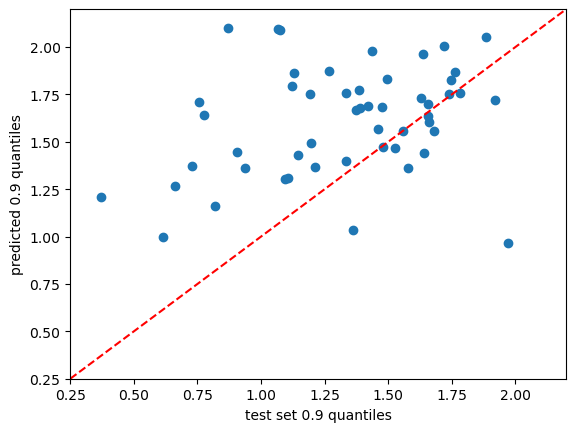

In [100]:
plt.scatter(test_quants, fitted_quantreg.predict(param_df.iloc[test_indx]))
plt.xlim([0.25, 2.2])
plt.ylim([0.25, 2.2])
plt.axline(xy1=(0,0), slope=1, linestyle='--', color='red')
plt.xlabel('test set 0.9 quantiles')
plt.ylabel('predicted 0.9 quantiles')

In [97]:
np.corrcoef(test_quants, fitted_quantreg.predict(param_df.iloc[test_indx]))

array([[1.        , 0.29745387],
       [0.29745387, 1.        ]])

In [72]:
test_indx

array([ 98, 192,  91, 200, 245,  72,  71, 199, 261,  19, 255, 132,  76,
       253,  55, 137, 151, 158, 239, 124, 223, 119,   2,  65, 224,  84,
        67, 131,  70,  21, 135,  25,  59, 218, 185, 220, 196, 123,  58,
       232, 157, 126,  93,  60, 178,  41, 252, 113, 182, 168, 109])

In [123]:
sub_form = 'PRECC ~ ' + ' * '.join(fitted_quantreg.pvalues.sort_values()[0:15].reset_index()['index'][1:].values)

In [124]:
sub_quantreg = smf.quantreg(sub_form, train_glob_precc)

In [ ]:
sub_fitted = sub_quantreg.fit(q=0.9)

In [122]:
sub_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  PRECC   Pseudo R-squared:               0.1430
Model:                       QuantReg   Bandwidth:                     0.06010
Method:                 Least Squares   Sparsity:                       0.9651
Date:                Tue, 30 Jul 2024   No. Observations:                 7560
Time:                        15:20:36   Df Residuals:                     7545
                                        Df Model:                           14
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.7140      0.022     78.191      0.000       1.671       1.757
zmconv_capelmt               -0.3466      0.012    -30.134      0.000      -0.369      -0.324
micro_mg_vtrmi_factor         0.2497      0.011     21.997      0.000       0.227       0.272
zmconv_tiedke_add             0.1660      0.012     13.739      0.000       0.142       0.190
zmconv_dmpdz                  0.1686      0.012     13.710      0.000       0.144       0.193
zmconv_c0_ocn                -0.2081      0.011    -18.219      0.000      -0.231      -0.186
micro_mg_accre_enhan_fact    -0.1748      0.011    -15.424      0.000      -0.197      -0.153
zmconv_num_cin                0.0899      0.011      8.490      0.000       0.069       0.111
microp_aero_npccn_scale      -0.1752      0.012    -14.322      0.000      -0.199      -0.151
micro_mg_iaccr_factor        -0.1513      0.011    -14.102      0.000      -0.172      -0.130
clubb_C2rt                    0.1541      0.012     12.962      0.000       0.131       0.177
clubb_C6rtb                   0.0778      0.011      7.042      0.000       0.056       0.099
microp_aero_wsub_min         -0.0594      0.012     -4.896      0.000      -0.083      -0.036
clubb_c1                     -0.0473      0.012     -3.972      0.000      -0.071      -0.024
dust_emis_fact                0.0609      0.012      4.986      0.000       0.037       0.085
=============================================================================================
"""